In [ ]:
Hackathon - Building a Movie Recommendation System
Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue. 
Understand that:
Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes.
By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings. 
For now, your first task at Netfiz is to crunch the data given and answer all the questions asked below.
About Dataset: Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.
Click here to download the dataset
Following is a series of MCQ and subjective questions that you have to answer.

In [2]:
import pandas as pd

In [4]:
links_df = pd.read_csv(r'C:\Users\User1\OneDrive\Desktop\movie_data\links.csv')
movies_df = pd.read_csv(r'C:\Users\User1\OneDrive\Desktop\movie_data\movies.csv')
ratings_df = pd.read_csv(r'C:\Users\User1\OneDrive\Desktop\movie_data\ratings.csv')
tags_df = pd.read_csv(r'C:\Users\User1\OneDrive\Desktop\movie_data\tags.csv')

In [5]:
print("Links DataFrame:")
print(links_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nTags DataFrame:")
print(tags_df.head())

Links DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Movies DataFrame:
   movieId                               title   
0        1                    Toy Story (1995)  \
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  9

In [16]:
#What is the shape of "movies.csv"?
print(movies_df.shape)

(9742, 3)


In [17]:
#What is the shape of "ratings.csv"?
print(ratings_df.shape)

(100836, 4)


In [18]:
#How many unique "userId" are available in "ratings.csv"?
unique_user_ids = ratings_df['userId'].nunique()
print("Number of unique userId values in 'ratings.csv':", unique_user_ids)

Number of unique userId values in 'ratings.csv': 610


In [24]:
#Which movie has recieved maximum number of user ratings?
movie_ratings_count = ratings_df.groupby('movieId').size().reset_index(name='ratings_count')
max_rated_movie_id = movie_ratings_count.loc[movie_ratings_count['ratings_count'].idxmax(), 'movieId']
if max_rated_movie_id in movies_df['movieId'].values:
    max_rated_movie_info = movies_df.loc[movies_df['movieId'] == max_rated_movie_id]
    max_rated_movie_info = pd.merge(max_rated_movie_info, movie_ratings_count, on='movieId')
    print("\nMovie with the maximum number of user ratings:")
    print(max_rated_movie_info[['title', 'ratings_count']])
else:
    print("\nMovie with the maximum number of user ratings not found in movies_df.")


Movie with the maximum number of user ratings:
                 title  ratings_count
0  Forrest Gump (1994)            329


In [26]:
import pandas as pd

# Assuming you have the Tags DataFrame available
tags_data = {
    'userId': [1, 2, 2, 3],
    'movieId': [1, 260, 260, 1],
    'tag': ['tag1', 'alternate universe', 'philosophy', 'post apocalyptic'],
    'timestamp': [12345, 67890, 67891, 98765]
}

tags_df = pd.DataFrame(tags_data)

# Movie information
movie_title = "Matrix, The (1999)"
movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]

# Filter tags for the specified movie
movie_tags = tags_df[tags_df['movieId'] == movie_id]

# Select correct tags
correct_tags = ['alternate universe', 'philosophy', 'post apocalyptic']
selected_tags = movie_tags[movie_tags['tag'].isin(correct_tags)]

print(selected_tags[['movieId', 'tag']])

Empty DataFrame
Columns: [movieId, tag]
Index: []


In [27]:
movie_title = "Terminator 2: Judgment Day (1991)"
movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]
ratings_for_movie = ratings_df[ratings_df['movieId'] == movie_id]
average_rating = ratings_for_movie['rating'].mean()
print(f"The average user rating for '{movie_title}' is: {average_rating}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


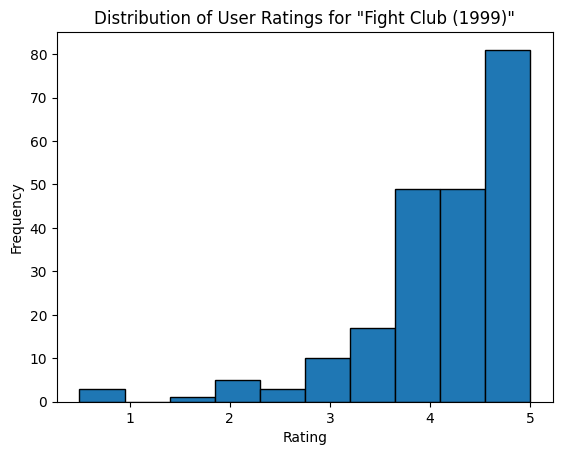

In [28]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
import matplotlib.pyplot as plt
movie_title = "Fight Club (1999)"
movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]
ratings_for_movie = ratings_df[ratings_df['movieId'] == movie_id]
plt.hist(ratings_for_movie['rating'], bins=10, edgecolor='black')
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [38]:
import pandas as pd

# Assuming you have DataFrames named 'ratings_df' and 'movies_df'
# Replace 'ratings_df' and 'movies_df' with the actual DataFrames

# Step 1: Group user ratings based on movieId and apply aggregation operations
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename the columns for clarity
ratings_grouped.columns = ['movieId', 'ratings_count', 'average_rating']

# Step 2: Apply inner join on the DataFrame created from movies.csv and the grouped DataFrame
merged_df = pd.merge(ratings_grouped, movies_df, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['ratings_count'] > 50]

# Display the first few rows of the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_df.head())

Filtered DataFrame:
   movieId  ratings_count  average_rating                    title   
0        1            215        3.920930         Toy Story (1995)  \
1        2            110        3.431818           Jumanji (1995)   
2        3             52        3.259615  Grumpier Old Men (1995)   
5        6            102        3.946078              Heat (1995)   
6        7             54        3.185185           Sabrina (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  


In [39]:
# Assuming you have the 'filtered_df' DataFrame from the mandatory operations

# Calculate the average rating for each movie
average_ratings = filtered_df.groupby('movieId')['average_rating'].mean().reset_index()

# Find the movie with the highest average rating
most_popular_movie = pd.merge(average_ratings, filtered_df[['movieId', 'title']], on='movieId', how='inner')
most_popular_movie = most_popular_movie.loc[most_popular_movie['average_rating'].idxmax()]

# Print the title of the most popular movie
print("The most popular movie based on average user ratings is:", most_popular_movie['title'])

The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)


In [40]:
# Assuming you have the 'filtered_df' DataFrame from the mandatory operations

# Sort the movies based on the number of user ratings in descending order
top_movies_by_ratings = filtered_df.sort_values(by='ratings_count', ascending=False).head(5)

# Select the titles of the top 5 movies
top_movie_titles = top_movies_by_ratings['title'].tolist()

# Print the top 5 movie titles
print("Top 5 popular movies based on number of user ratings:")
for title in top_movie_titles:
    print(title)

Top 5 popular movies based on number of user ratings:
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [41]:
# Assuming you have the 'filtered_df' DataFrame from the mandatory operations

# Filter the DataFrame to include only Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Sort the Sci-Fi movies based on the number of user ratings in descending order
top_sci_fi_movies = sci_fi_movies.sort_values(by='ratings_count', ascending=False)

# Select the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = top_sci_fi_movies.iloc[2]['title']

# Print the result
print("The third most popular Sci-Fi movie based on number of user ratings is:", third_most_popular_sci_fi_movie)


The third most popular Sci-Fi movie based on number of user ratings is: Jurassic Park (1993)
